# FIT5202 Data processing for Big Data
# Assignment 2B: <h3>Real-time stream processing on big data</h3>

Student Name: PEIYU LIU
<br>Student ID: 31153291

<h1>3 Streaming application using Spark Structured Streaming</h1>

SparkSession is created using a SparkConf object
<br>use two local cores with a proper application name, and use UTC as the timezone 3

<h3>1 create spark session</h3>

reference: Set timezone to UTC <br>
https://stackoverflow.com/questions/49644232/apache-spark-how-to-set-timezone-to-utc-currently-defaulted-to-zulu

In [1]:
#import libraries
import os
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages org.apache.spark:spark-streaming-kafka-0-10_2.12:3.0.0,org.apache.spark:spark-sql-kafka-0-10_2.12:3.0.0 pyspark-shell'

#import libraries
from pyspark import SparkConf
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import Row, SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.functions import regexp_extract
appName="StructuredStreamingKafka_Ass_2B"
appMaster ="local[*]"
#initialize the spark, set UTC as timezone
# https://stackoverflow.com/questions/49644232/apache-spark-how-to-set-timezone-to-utc-currently-defaulted-to-zulu
spark_conf = SparkConf().setMaster(appMaster).setAppName(appName).set('spark.sql.session.timeZone','UTC')
spark = SparkSession.builder.config(conf = spark_conf).getOrCreate()

<h3>2 ingest the streaming data into Spark Streaming

<code>Learned from week10 tutorial</code>

In [2]:
# Monitor the logs data stream for new log data
topic = "flightTopic"
load_flightRecords = spark \
  .readStream \
  .format("kafka") \
  .option("kafka.bootstrap.servers", "127.0.0.1:9092") \
  .option("subscribe", topic) \
  .load()
# show structure to check data
load_flightRecords.printSchema()

root
 |-- key: binary (nullable = true)
 |-- value: binary (nullable = true)
 |-- topic: string (nullable = true)
 |-- partition: integer (nullable = true)
 |-- offset: long (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- timestampType: integer (nullable = true)



<h3>3 streaming data format

set strcuttype for each columns in loaded data
['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER','TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT','SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE','WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME','ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON','AIR_SYSTEM_DELAY', 
'SECURITY_DELAY', 'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'] add ['ts']
<br>reference: 
<br>Data Formats with Structured Streaming https://databricks.com/blog/2017/02/23/working-complex-data-formats-structured-streaming-apache-spark-2-1.html
<br>StructField https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.types.StructType.html
<br> Analysis streaming query progresses being ingested in Kafka topic https://gist.github.com/HeartSaVioR/9d53b39052d4779a4c77e71ff7e989a3

In [3]:
#StructField(name, dataType, nullable=True, metadata=None)[source]¶

data_schema = ArrayType(StructType([StructField('YEAR',IntegerType(),True),# set YEAR as integer and can be null
                                    # set MONTH as integer and can be null
                                     StructField('MONTH',IntegerType(),True),
                                    # set DAY as integer and can be null
                                     StructField('DAY',IntegerType(),True),
                                    # set DAY_OF_WEEK as integer and can be null
                                      StructField('DAY_OF_WEEK',IntegerType(),True),
                                    # set AIRLINE as string and can be null
                                      StructField('AIRLINE',StringType(),True),
                                    # set FLIGHT_NUMBER as integer and can be null
                                      StructField('FLIGHT_NUMBER',IntegerType(),True),
                                    # set TAIL_NUMBER as string and can be null
                                      StructField('TAIL_NUMBER',StringType(),True),
                                    # set ORIGIN_AIRPORT as string and can be null
                                      StructField('ORIGIN_AIRPORT',StringType(),True),
                                    # set DESTINATION_AIRPORT as string and can be null
                                      StructField('DESTINATION_AIRPORT',StringType(),True),
                                    # set SCHEDULED_DEPARTURE as integer and can be null
                                      StructField('SCHEDULED_DEPARTURE',IntegerType(),True),
                                    # set DEPARTURE_TIME as double and can be null
                                      StructField('DEPARTURE_TIME',DoubleType(),True),
                                    # set DEPARTURE_DELAY as double and can be null
                                      StructField('DEPARTURE_DELAY',DoubleType(),True),
                                    # set TAXI_OUT as double and can be null
                                      StructField('TAXI_OUT',DoubleType(),True),
                                    # set WHEELS_OFF as double and can be null
                                      StructField('WHEELS_OFF',DoubleType(),True),
                                    # set SCHEDULED_TIME as double and can be null
                                      StructField('SCHEDULED_TIME',DoubleType(),True),
                                    # set ELAPSED_TIME as double and can be null
                                      StructField('ELAPSED_TIME',DoubleType(),True),
                                    # set AIR_TIME as double and can be null
                                      StructField('AIR_TIME',DoubleType(),True),
                                    # set DISTANCE as integer and can be null
                                      StructField('DISTANCE',IntegerType(),True),
                                    # set WHEELS_ON as double and can be null
                                      StructField('WHEELS_ON',DoubleType(),True),
                                    # set TAXI_IN as double and can be null
                                      StructField('TAXI_IN',DoubleType(),True),
                                    # set SCHEDULED_ARRIVAL as integer and can be null
                                      StructField('SCHEDULED_ARRIVAL',IntegerType(),True),
                                    # set ARRIVAL_TIME as double and can be null
                                      StructField('ARRIVAL_TIME',DoubleType(),True),
                                    # set ARRIVAL_DELAY as double and can be null
                                      StructField('ARRIVAL_DELAY',DoubleType(),True),
                                    # set DIVERTED as integer and can be null
                                      StructField('DIVERTED',IntegerType(),True),
                                    # set YEAR as integer and can be null
                                      StructField('CANCELLED',IntegerType(),True),
                                    # set CANCELLATION_REASON as string and can be null
                                      StructField('CANCELLATION_REASON',StringType(),True),
                                     # set AIR_SYSTEM_DELAY as double and can be null
                                      StructField('AIR_SYSTEM_DELAY',DoubleType(),True),
                                     # set SECURITY_DELAY as double and can be null
                                      StructField('SECURITY_DELAY',DoubleType(),True),
                                     # set AIRLINE_DELAY as double and can be null
                                      StructField('AIRLINE_DELAY',DoubleType(),True),
                                     # set LATE_AIRCRAFT_DELAY as double and can be null
                                      StructField('LATE_AIRCRAFT_DELAY',DoubleType(),True),
                                     # set WEATHER_DELAY as double and can be null
                                      StructField('WEATHER_DELAY',DoubleType(),True),
                                     # set timestamp as integer and can be null
                                      StructField('ts',IntegerType(),True)]))

Parse columns in json string to other keys types.
reference: https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.functions.from_json.html

In [4]:
# parse the json structure, 
#nest the StrucType format, 
#and other columns of the original data are kept in the format set by the schema.
#give name parsed_value
#https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.functions.from_json.html
#Parse the column containing JSON string into StringType as keys type, and StructType specifies the mode.
load_flightRecords2 = load_flightRecords.select(from_json(col('value').cast('string'),data_schema).alias('parsed_value'))

In [5]:
# write steaming data to console to check format 
query_records2 = load_flightRecords2 \
    .writeStream \
    .outputMode("append") \
    .format("console") \
    .trigger(processingTime='5 seconds') \
    .start()

In [6]:
#stop query
query_records2.stop()

Use the explosion function to create a new row for each key-value pair and flatten the data.
<br>reference: explode: https://databricks.com/blog/2017/04/26/processing-data-in-apache-kafka-with-structured-streaming-in-apache-spark-2-2.html
<br>https://stackoverflow.com/questions/61393710/pyspark-explode-columns-to-new-dataframe

In [7]:
                            #explode columns to new dataframe
load_flightRecords3 = load_flightRecords2.select(explode(col('parsed_value'))\
                            .alias('unnested_value'))#use new column name 

In [8]:
query_records3 = load_flightRecords3\
                .writeStream\
                .outputMode("append")\
                .format("console")\
                .trigger(processingTime='5 seconds')\
                .start()

In [9]:
# stop query
query_records3.stop()

<h3>model columns model I choose from assignment 2A</h3>
<br>category columns: ['FLIGHT_NUMBER', 'DISTANCE', 'ARRIVAL_TIME','DEPARTURE_TIME']
<br> int columns:
['MONTH','DAY','SCHEDULED_DEPARTURE','TAXI_OUT','WHEELS_OFF','DAY_OF_WEEK',
'SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','SCHEDULED_ARRIVAL']

In [10]:
model_categories=['FLIGHT_NUMBER', 
                   'DISTANCE', 
                   'ARRIVAL_TIME', 
                   'DEPARTURE_TIME']
model_normal_cols=['MONTH',
 'DAY',
 'SCHEDULED_DEPARTURE',
 'TAXI_OUT',
 'WHEELS_OFF','DAY_OF_WEEK',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'WHEELS_ON',
 'TAXI_IN',
 'SCHEDULED_ARRIVAL']

In [11]:
model_cols = model_normal_cols+model_categories+['ts','ARRIVAL_DELAY']# add timestamp column and arrival_delay column

In [12]:
# select model columns from records data
# https://stackoverflow.com/questions/38753898/how-to-flatten-a-struct-in-a-spark-dataframe
load_flightRecords4 = load_flightRecords3.select([col(f"unnested_value.{column}") for column in model_cols])

In [13]:
# write steaming data to console to check format 
query_records4 = load_flightRecords4 \
    .writeStream \
    .outputMode("append") \
    .format("console") \
    .trigger(processingTime='5 seconds') \
    .start()

In [14]:
## stop query
query_records4.stop()

In [15]:
# add delay label 
# create new column as label, set value :if arrival_delay set label as 1 otherwise label = 0
# creat new column as timestamp, set value: ts
# reference: https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.withColumn.html
load_flightRecords5=load_flightRecords4\
                    .withColumn('label', when(col('ARRIVAL_DELAY')>=0,1).otherwise(0))\
                    .withColumn('timestamp_',col('ts').cast(TimestampType()))

In [16]:
# write steaming data to console to check format 
query_records5 = load_flightRecords5 \
    .writeStream \
    .outputMode("append") \
    .format("console") \
    .trigger(processingTime='5 seconds') \
    .start()

In [17]:
# stop query
query_records5.stop()

streaming data in parquet format for flight data

In [18]:
query_parquet = load_flightRecords5\
                    .writeStream.format("parquet")\
                    .outputMode("append") \
                    .option("path","flight.parquet")\
                    .option("checkpointLocation","flight.parquet/checkpoint")\
                    .trigger(processingTime = '5 seconds')\
                    .start()

In [19]:
query_parquet.stop()

<h1>Load model</h1>

Read the 20 files of “flight*.csv” flightsRawDf
<br>Set types for each column: StructField 

Reference: list all files:https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
<br>StructField: #StructField(name, dataType, nullable=True, metadata=None)[source]¶https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.types.StructField.html
<br>Literate all flight files in flight folder. Add files' names with files' path into list

In [20]:
def load_data(file_path):
    file_path = file_path
    files = os.listdir(file_path)
    file_container = []
    for file in files:
        if file.startswith('flight'):  # need all “flight*.csv” files
            file_container.append('./flight-delays/' + file)
    return file_container

In [ ]:
# set columns' structure when Read data from file
#StructField(name, dataType, nullable=True, metadata=None)[source]¶
# https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.types.StructField.html
flight_schema_format = StructType([StructField('YEAR',IntegerType(),True),
                                     StructField('MONTH',IntegerType(),True),
                                     StructField('DAY',IntegerType(),True),
                                      StructField('DAY_OF_WEEK',IntegerType(),True),
                                      StructField('AIRLINE',StringType(),True),
                                      StructField('FLIGHT_NUMBER',IntegerType(),True),
                                      StructField('TAIL_NUMBER',StringType(),True),
                                      StructField('ORIGIN_AIRPORT',StringType(),True),
                                      StructField('DESTINATION_AIRPORT',StringType(),True),
                                      StructField('SCHEDULED_DEPARTURE',IntegerType(),True),
                                      StructField('DEPARTURE_TIME',DoubleType(),True),
                                      StructField('DEPARTURE_DELAY',DoubleType(),True),
                                      StructField('TAXI_OUT',DoubleType(),True),
                                      StructField('WHEELS_OFF',DoubleType(),True),
                                      StructField('SCHEDULED_TIME',DoubleType(),True),
                                      StructField('ELAPSED_TIME',DoubleType(),True),
                                      StructField('AIR_TIME',DoubleType(),True),
                                      StructField('DISTANCE',IntegerType(),True),
                                      StructField('WHEELS_ON',DoubleType(),True),
                                      StructField('TAXI_IN',DoubleType(),True),
                                      StructField('SCHEDULED_ARRIVAL',IntegerType(),True),
                                      StructField('ARRIVAL_TIME',DoubleType(),True),
                                      StructField('ARRIVAL_DELAY',DoubleType(),True),
                                      StructField('DIVERTED',IntegerType(),True),
                                      StructField('CANCELLED',IntegerType(),True),
                                      StructField('CANCELLATION_REASON',StringType(),True),
                                      StructField('AIR_SYSTEM_DELAY',DoubleType(),True),
                                      StructField('SECURITY_DELAY',DoubleType(),True),
                                      StructField('AIRLINE_DELAY',DoubleType(),True),
                                      StructField('LATE_AIRCRAFT_DELAY',DoubleType(),True),
                                      StructField('WEATHER_DELAY',DoubleType(),True),
                                      StructField('ts',IntegerType(),True)])

In [ ]:
# import data from files by pre-setted data types, leave hearder.
flights_records = spark.read.csv(load_data('flight-delays/'),schema = flight_schema_format,header = "true")

In [ ]:
flights_records

In [ ]:
model_all_columns = model_normal_cols+model_categories+['ARRIVAL_DELAY','label']
## set label when delay:1,# not delay: 0
flights_records = flights_records.withColumn('label',when(col('ARRIVAL_DELAY')>=0,1).otherwise(0)).select([col(column)for column in model_all_columns])

In [ ]:
flights_records

In [ ]:
# drop nan value
flights_records = flights_records.dropna(how="any")

In [ ]:
flights_records.printSchema()

StringIndexer encodes the string column of the label into a column of label index.
<br>One-hot encoding maps the categorical features into a binary vector, in which there is only one valid value (1, the rest are 0).
<br>Vector is to number the category (discrete value) features in the feature vector of the data set, and set the input column and parameters of the type to Vector. VectorAssembler is a <br>transformer that converts multiple columns of data into a single column of vector columns.
<br>pipeline acts as an estimator,and consists of a sequence of stages
<br>Reference: https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.feature.StringIndexer.html
https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.Pipeline.html?highlight=pipeline#pyspark.ml.Pipeline
https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.feature.OneHotEncoder.html?highlight=onehot#pyspark.ml.feature.OneHotEncoder
https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.feature.VectorAssembler.html?highlight=vector#pyspark.ml.feature.VectorAssembler

In [ ]:
# FIT5202 Data processing for big data session6_class_code
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml import Transformer
from pyspark.ml.classification import DecisionTreeClassifier
#https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.classification.DecisionTreeClassifier.html
#https://www.kaggle.com/bombatkarvivek/pyspark-ml-decision-tree-classifier
#model 1


def combined_transform(category_columns, related_columns):
    inputCols = [x for x in category_columns]
    # encodes the column of the label into a column of label index.
    outputCols = [f'{c}_index' for c in category_columns]
    indexer = StringIndexer(inputCols=inputCols, outputCols=outputCols)
    inputCols_OHE = [x for x in outputCols]
    outputCols_OHE = [f'{x}_vec' for x in inputCols]
    #One-hot encoding maps the categorical features into a binary vector, 
    # in which there is only one valid value (1, the rest are 0).
    encoder = OneHotEncoder(inputCols=inputCols_OHE,outputCols=outputCols_OHE)
    inputCols_ASB = outputCols_OHE+related_columns
    #converts multiple columns of data into a single column of vector columns
    assembler = VectorAssembler(inputCols=inputCols_ASB,outputCol='features')
    decisionTree = DecisionTreeClassifier(featuresCol='features',labelCol='label', maxDepth=3)
    return[indexer,encoder,assembler,decisionTree]

#pipeline acts as an estimator,and consists of a sequence of stages
flightsDf_pipeline = Pipeline(stages= combined_transform(model_categories,model_normal_cols))

In [ ]:
model = flightsDf_pipeline.fit(flights_records)

<h3>save model</h3>
reference: save model and load model: https://www.tensorflow.org/tutorials/keras/save_and_load

In [ ]:
model.save('learning_model_2B')

<h3> Training data

read model from path and use model to do data trainning
<br>- load(): Read model from the input path, load(path).
<br>- drop any null value
<br>- use model to training and tranform data
<br>reference: https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.PipelineModel.html#pyspark.ml.PipelineModel.load
<br>https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.PipelineModel.html


In [20]:
from pyspark.ml import PipelineModel
#pyspark.ml.PipelineModel(stages)[source]
# load(): Read model from the input path, load(path).
loaded_model = PipelineModel.load('learning_model_2B')
null_mode = 'any'
# drop any null value
load_flightRecords5 = load_flightRecords5.dropna(how =null_mode)
# use model to training and tranform data
records_prediction = loaded_model.transform(load_flightRecords5)

In [21]:
# check columns
records_prediction.printSchema()

root
 |-- MONTH: integer (nullable = true)
 |-- DAY: integer (nullable = true)
 |-- SCHEDULED_DEPARTURE: integer (nullable = true)
 |-- TAXI_OUT: double (nullable = true)
 |-- WHEELS_OFF: double (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- SCHEDULED_TIME: double (nullable = true)
 |-- ELAPSED_TIME: double (nullable = true)
 |-- AIR_TIME: double (nullable = true)
 |-- WHEELS_ON: double (nullable = true)
 |-- TAXI_IN: double (nullable = true)
 |-- SCHEDULED_ARRIVAL: integer (nullable = true)
 |-- FLIGHT_NUMBER: integer (nullable = true)
 |-- DISTANCE: integer (nullable = true)
 |-- ARRIVAL_TIME: double (nullable = true)
 |-- DEPARTURE_TIME: double (nullable = true)
 |-- ts: integer (nullable = true)
 |-- ARRIVAL_DELAY: double (nullable = true)
 |-- label: integer (nullable = false)
 |-- timestamp_: timestamp (nullable = true)
 |-- FLIGHT_NUMBER_index: double (nullable = false)
 |-- DISTANCE_index: double (nullable = false)
 |-- ARRIVAL_TIME_index: double (nullable =

- only need keyFilight = 1,keyFilight = 2,keyFilight = 3
- select related coulmns
- change prediction type formate same as label
- accuracy means result of prediciton and result of label are same
- if results are same, set value 1, otherwise set 0
- group data by 'DAY_OF_WEEK'
- Use groupBy() and window() operations to express windowed aggregation
- every timestamp in the 2-min window
- write one record each 5 seconds
- count how many records in total as number of records
- accuracy rate is equal to accuracy/total records
<br><code> Learned from week11 tutorial Spark Streaming Watermarking DEMO [V 1.1]</code>
<br>reference: https://spark.apache.org/docs/latest/structured-streaming-programming-guide.html#handling-late-data-and-watermarking

In [22]:
records_prediction2 = records_prediction.filter('DAY_OF_WEEK <= 3').select(['DAY_OF_WEEK','timestamp_','label','prediction']).withColumn('prediction',col('prediction').cast('integer')).withColumn('accuracy',when(col('label')==col('prediction'),1).otherwise(0)).groupBy('DAY_OF_WEEK',window(col('timestamp_'),'2 minutes','5 seconds')).agg(count('*').alias('number_of_records'),(sum(col('accuracy'))/count('*')).alias('accuracy_rate'))

In [23]:
query_prediciton2 = records_prediction2.writeStream.outputMode("update")\
                    .format("console") \
                    .trigger(processingTime='5 seconds') \
                    .start()

In [24]:
query_prediciton2.stop()

reference: streaming output:https://docs.databricks.com/_static/notebooks/structured-streaming-python.html

In [25]:
#Change the output sink to "memory" and write output to the memory sink
# set query name can use sql to read data
#output is stored in memory as an in-memory table
#  Append and Complete output modes
query_prediction2_sink = records_prediction2.writeStream.queryName("final_prediction").outputMode("complete") \
                        .format("memory") \
                        .trigger(processingTime='5 seconds') \
                        .start()

In [ ]:
query_prediction2_sink.stop()

<IPython.core.display.Javascript object>


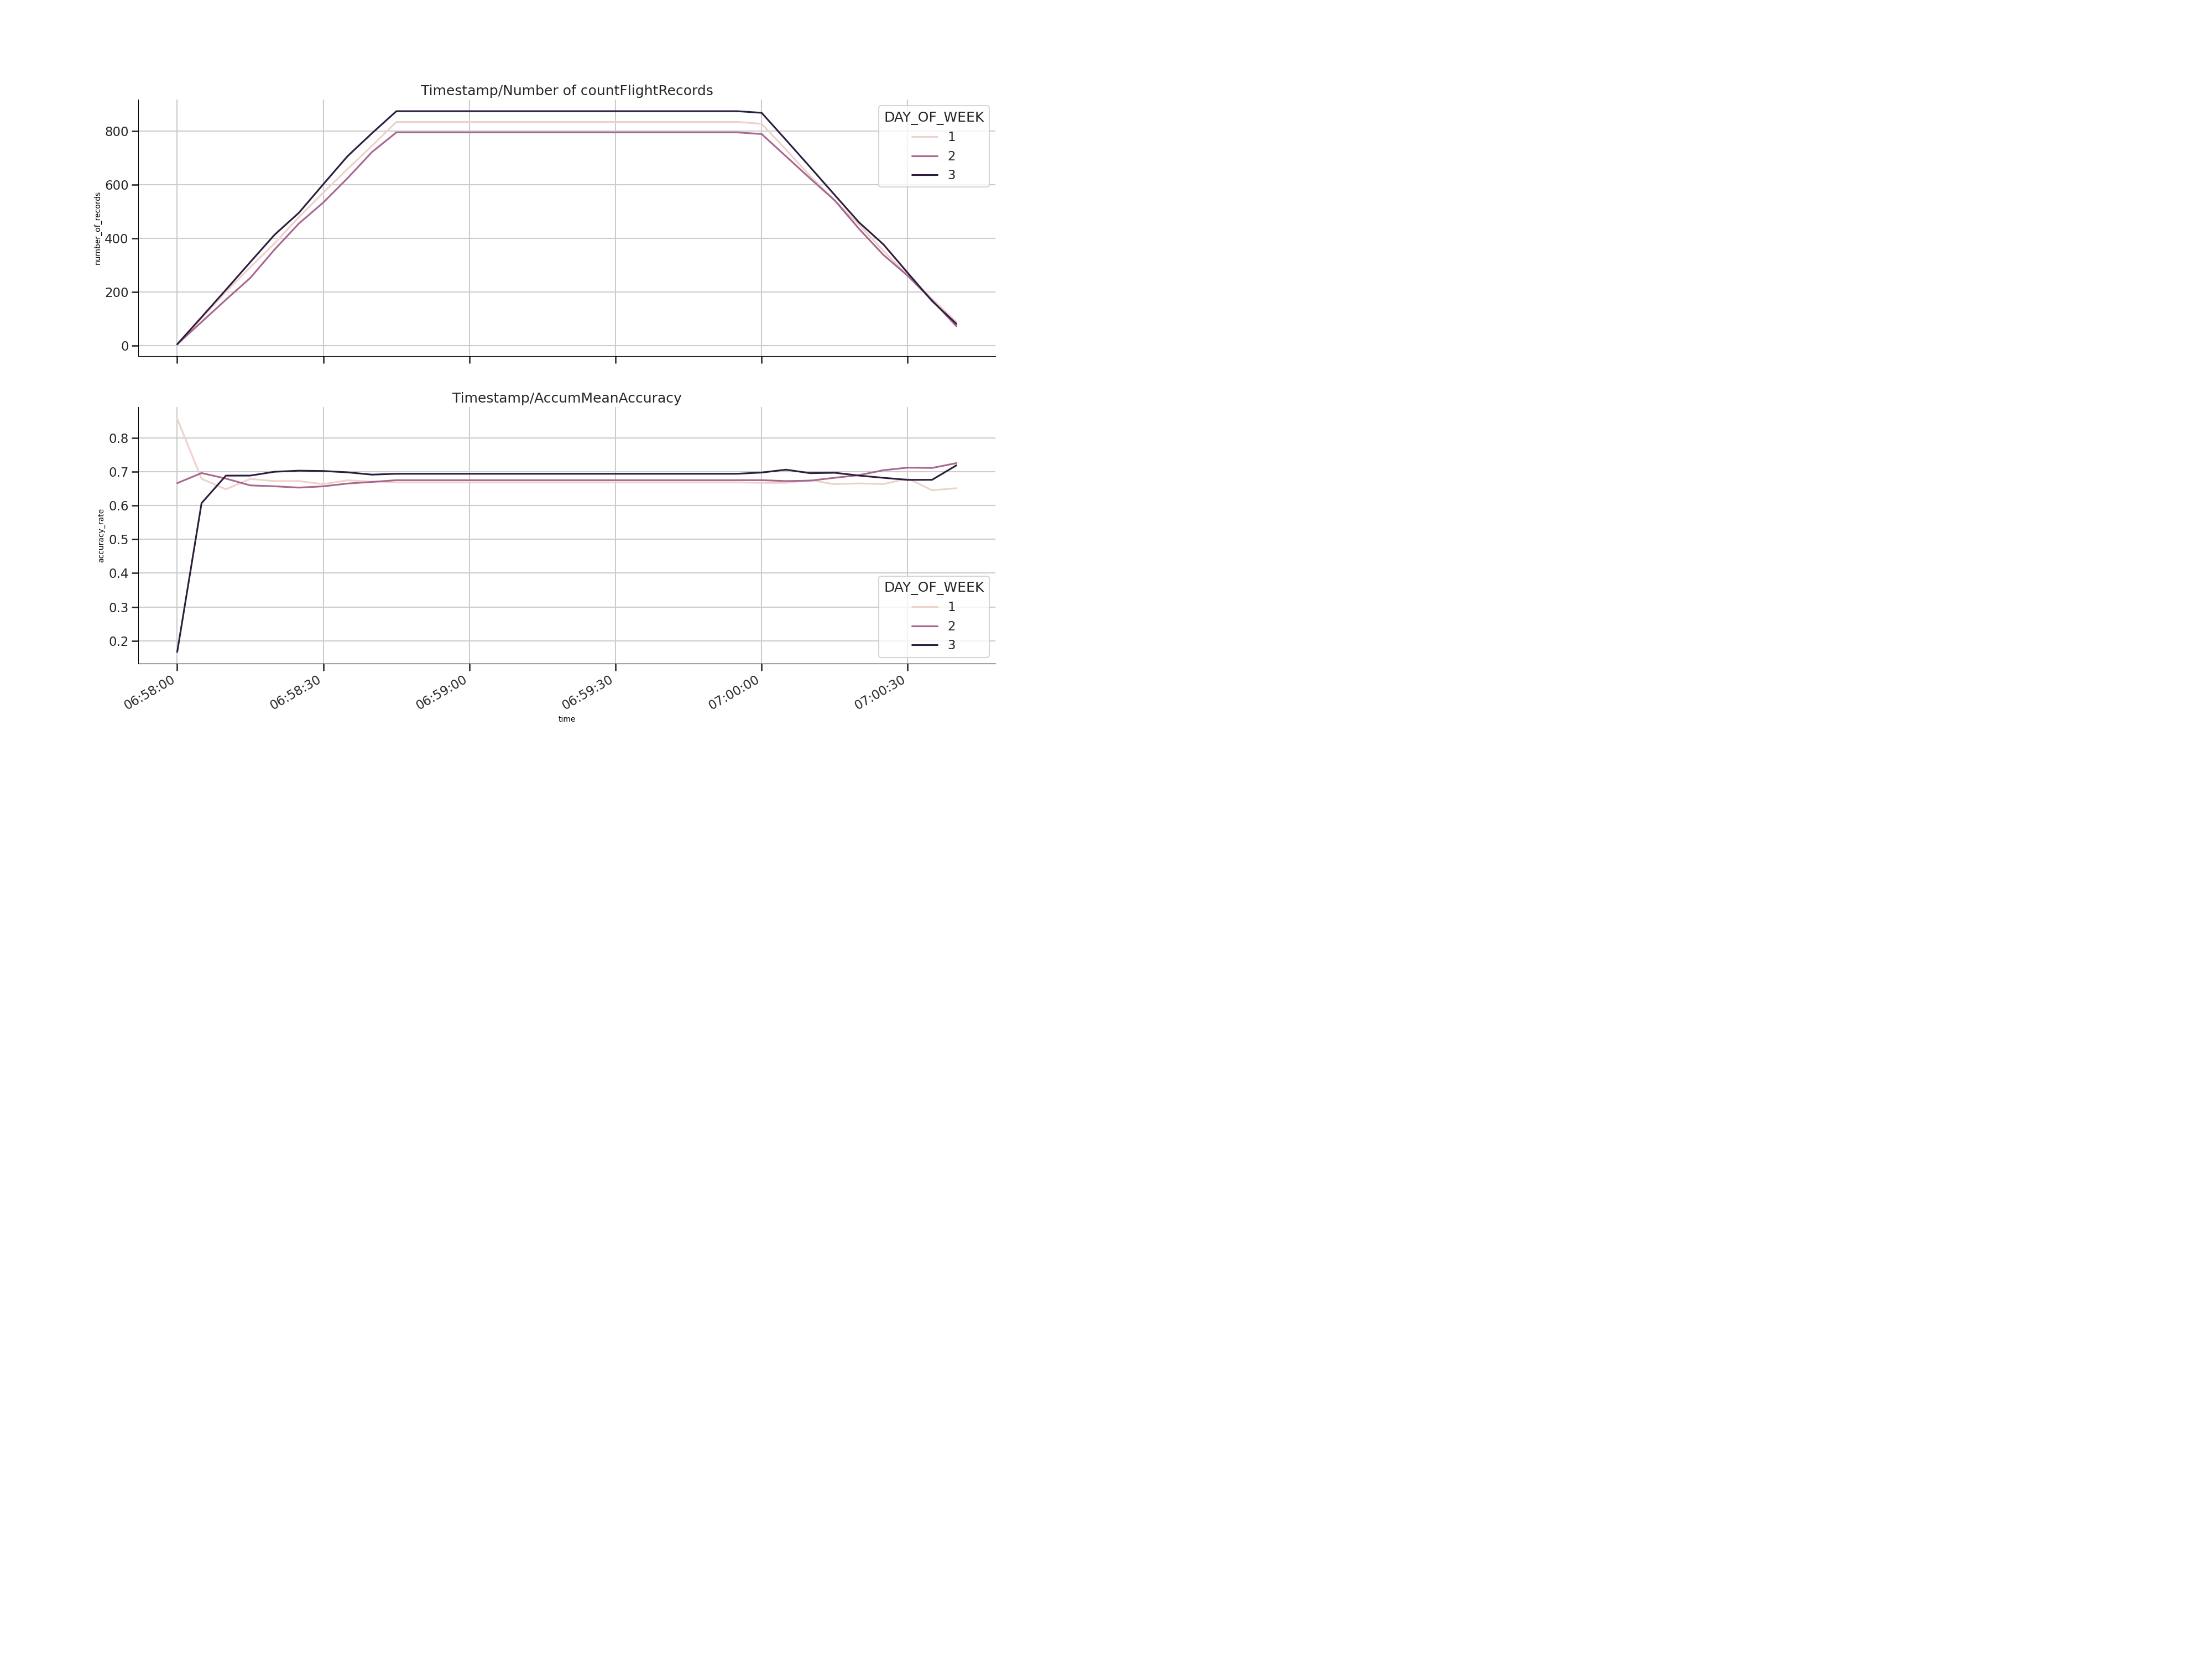

In [ ]:
import matplotlib.pyplot as plt
from time import sleep
# reference:https://seaborn.pydata.org/generated/seaborn.lineplot.html
import seaborn as sns
%matplotlib notebook
fig,axs = plt.subplots(2,1)# draw two figure
# set style size
fig.set_figheight(15)
fig.set_figwidth(20)
# set background style
sns.set_style('whitegrid')
#set font
sns.set_context("talk", font_scale=1, rc={'line.linewidth':2.5}) 
# remove border
sns.despine() 
while True:
    axs[0].clear()
    axs[1].clear()
    #autofmt_xdate() Rotation module right aligned
    fig.autofmt_xdate()
    # figure 1 is time vs total number of records
    axs[0].set_title('Timestamp/Number of countFlightRecords')
    # figure 2 is time vs accuracy rate
    axs[1].set_title('Timestamp/AccumMeanAccuracy')
    # select data from previous query streaming data and convert to pandas format.
    # then use column name to exact data from pandas 
    sink_data = spark.sql('select * from final_prediction').toPandas()
    # creating window
    # set time columns using each window
    sink_data['time']=sink_data.window.apply(lambda x:x[1])
    # draw line chart
    #draw a line plot using long-form data, assign the x and y variables
    # x axis is time, y axis is total number of records, legend as keyFlight =1,2,3, ax Pre-existing axes for the plot
    sns.lineplot(data=sink_data,x='time',y='number_of_records',hue='DAY_OF_WEEK',legend='auto',ax=axs[0])
    # x axis is time, y axis is accuracy rate, legend as keyFlight =1,2,3
    sns.lineplot(data=sink_data,x='time',y='accuracy_rate',hue='DAY_OF_WEEK',legend='auto',ax=axs[1])
    fig.canvas.draw()
    sleep(5)
